In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

np.int64(120)

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,smart world orchard,sector 61,2.57,15766.0,1630.0,Carpet area: 1630 (151.43 sq.m.),3.0,3.0,2,study room,3.0,North-East,Under Construction,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']","['3 AC', '1 Chimney', '1 Modular Kitchen', '1 TV', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",['Lift(s)']


## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2731,3.40,2250.0,Plot area 250(209.03 sq.m.)
2598,3.60,3400.0,Super Built up area 3400(315.87 sq.m.)
3752,2.85,1828.0,Super Built up area 1828(169.83 sq.m.)
853,0.48,800.0,Carpet area: 800 (74.32 sq.m.)
1815,5.70,1382.0,Built Up area: 1382 (128.39 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3340,1.24,flat,1918.0,Super Built up area 1918(178.19 sq.m.)Built Up area: 1650 sq.ft. (153.29 sq.m.)Carpet area: 1550 sq.ft. (144 sq.m.),1918.0,1650.0,1550.0
2330,1.90,flat,3343.0,Super Built up area 2727(253.35 sq.m.),2727.0,NaN,NaN
783,0.80,flat,1342.0,Super Built up area 1342(124.68 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),1342.0,NaN,1000.0
3632,5.00,flat,6500.0,Carpet area: 5200 (483.1 sq.m.),NaN,NaN,5200.0
1092,3.69,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN


In [12]:
df.duplicated().sum()

np.int64(120)

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,4.75,house,2367.0,Plot area 263(219.9 sq.m.)Built Up area: 261 sq.yards (218.23 sq.m.)Carpet area: 259 sq.yards (216.56 sq.m.),NaN,261.0,259.0
11,1.10,house,200.0,Plot area 200(18.58 sq.m.),NaN,NaN,NaN
15,5.50,house,2546.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
29,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,NaN,NaN
39,7.85,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          980
features                635
super_built_up_area    1887
built_up_area          2615
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
11,1.10,house,200.0,Plot area 200(18.58 sq.m.),NaN,NaN,NaN
15,5.50,house,2546.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
29,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,NaN,NaN
39,7.85,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
41,10.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
11,1.10,house,200.0,Plot area 200(18.58 sq.m.),NaN,200.00,NaN
15,5.50,house,2546.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
29,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,1160.00,NaN
39,7.85,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
41,10.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
45,NaN,house,NaN,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
50,11.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
57,12.00,house,3150.0,Plot area 350(292.64 sq.m.),NaN,350.00,NaN
63,4.15,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.00,NaN
67,10.45,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
11,1.10,house,200.0,Plot area 200(18.58 sq.m.),NaN,200.00,NaN
15,5.50,house,2546.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
29,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,1160.00,NaN
39,7.85,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
41,10.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
45,NaN,house,NaN,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
50,11.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
57,12.00,house,3150.0,Plot area 350(292.64 sq.m.),NaN,3150.00,NaN
63,4.15,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.00,NaN
67,10.45,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          980
features                635
super_built_up_area    1887
built_up_area          2069
carpet_area            1859
dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,smart world orchard,sector 61,2.57,15766.0,1630.0,Carpet area: 1630 (151.43 sq.m.),3.0,3.0,2,study room,3.0,North-East,Under Construction,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']","['3 AC', '1 Chimney', '1 Modular Kitchen', '1 TV', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",['Lift(s)'],NaN,NaN,1630.0
1,flat,m3m one key resiments,sector 67,0.80,13115.0,610.0,Built Up area: 610 (56.67 sq.m.),1.0,1.0,0,not available,0.0,NaN,undefined,"['Global Foyer Mall', 'Dwarka Expressway', 'ST. SOLDIER DIVINE PUBLIC SCHOOL', 'Monika Hospital', 'Indira Gandhi International Airport', 'Palam Vihar Halt', 'Fun N Food Village']",NaN,NaN,NaN,610.0,NaN
2,flat,paras dews,sector 106,1.25,10656.0,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up area: 1305 sq.ft. (121.24 sq.m.)Carpet area: 1173 sq.ft. (108.98 sq.m.),3.0,4.0,3,"study room,servant room",14.0,East,1 to 5 Year Old,"['MG Road Metro Station', 'NeoSquare Shopping Mall', 'Dwarka Expressway', 'Glorious World School', 'DPG Institute of Technology', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon', 'Country Inn & Suites by Radisson', 'SkyJumper Trampoline Park', 'Hamoni Golf Camp']",NaN,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1900.0,1305.0,1173.0
3,flat,ss the leaf3.8 ï¿½,sector 85,1.10,6318.0,1741.0,Super Built up area 1741(161.74 sq.m.)Carpet area: 1218 sq.ft. (113.16 sq.m.),2.0,2.0,3+,store room,3.0,South-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['10 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1741.0,NaN,1218.0
4,flat,umang winter hills3.9 ï¿½,sector 77,0.75,5588.0,1342.0,Super Built up area 1342(124.68 sq.m.)Built Up area: 1140 sq.ft. (105.91 sq.m.)Carpet area: 969 sq.ft. (90.02 sq.m.),2.0,2.0,2,store room,8.0,Sout

## 2.additionalRoom

In [28]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1586
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
728,"pooja room,servant room",0,1,0,1,0
3404,not available,0,0,0,0,0
2983,not available,0,0,0,0,0
3457,not available,0,0,0,0,0
1275,not available,0,0,0,0,0


In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,smart world orchard,sector 61,2.57,15766.0,1630.0,Carpet area: 1630 (151.43 sq.m.),3.0,3.0,2,study room,3.0,North-East,Under Construction,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']","['3 AC', '1 Chimney', '1 Modular Kitchen', '1 TV', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",['Lift(s)'],NaN,NaN,1630.0,1,0,0,0,0
1,flat,m3m one key resiments,sector 67,0.80,13115.0,610.0,Built Up area: 610 (56.67 sq.m.),1.0,1.0,0,not available,0.0,NaN,undefined,"['Global Foyer Mall', 'Dwarka Expressway', 'ST. SOLDIER DIVINE PUBLIC SCHOOL', 'Monika Hospital', 'Indira Gandhi International Airport', 'Palam Vihar Halt', 'Fun N Food Village']",NaN,NaN,NaN,610.0,NaN,0,0,0,0,0
2,flat,paras dews,sector 106,1.25,10656.0,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up area: 1305 sq.ft. (121.24 sq.m.)Carpet area: 1173 sq.ft. (108.98 sq.m.),3.0,4.0,3,"study room,servant room",14.0,East,1 to 5 Year Old,"['MG Road Metro Station', 'NeoSquare Shopping Mall', 'Dwarka Expressway', 'Glorious World School', 'DPG Institute of Technology', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon', 'Country Inn & Suites by Radisson', 'SkyJumper Trampoline Park', 'Hamoni Golf Camp']",NaN,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1900.0,1305.0,1173.0,1,1,0,0,0
3,flat,ss the leaf3.8 ï¿½,sector 85,1.10,6318.0,1741.0,Super Built up area 1741(161.74 sq.m.)Carpet area: 1218 sq.ft. (113.16 sq.m.),2.0,2.0,3+,store room,3.0,South-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['10 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1741.0,NaN,1218.0,0,0,1,0,0
4,flat,umang winter hills3.9 ï¿½,sector 77,0.75,5588.0,1342.0,Super Built up area 1342(124.68 sq.m.)Built Up area: 

## 3.agePossession

In [32]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      89
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Dec-25                   7
Aug-23                   7
Jan-24                   7
Oct-24                   7
Nov-23                   5
Jun-24                   5
Sep-23                   4
By 2025                  4
Aug-24                   4
Jul-24                   4
May-24                   3
Jan-25                   3
Feb-24                   3
Oct-23                   3
Nov-24                   3
Jun-27                   2
Apr-26                   2
Mar-25                   2
Jul-25                   2
Jan-26                   2
Jun 2024                 2
Dec 2023                 2
Jul-27                   2
Sep-25        

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              476
Old Property           310
Under Construction     139
Name: count, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,smart world orchard,sector 61,2.57,15766.0,1630.0,Carpet area: 1630 (151.43 sq.m.),3.0,3.0,2,study room,3.0,North-East,Under Construction,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']","['3 AC', '1 Chimney', '1 Modular Kitchen', '1 TV', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",['Lift(s)'],NaN,NaN,1630.0,1,0,0,0,0
1,flat,m3m one key resiments,sector 67,0.80,13115.0,610.0,Built Up area: 610 (56.67 sq.m.),1.0,1.0,0,not available,0.0,NaN,Undefined,"['Global Foyer Mall', 'Dwarka Expressway', 'ST. SOLDIER DIVINE PUBLIC SCHOOL', 'Monika Hospital', 'Indira Gandhi International Airport', 'Palam Vihar Halt', 'Fun N Food Village']",NaN,NaN,NaN,610.0,NaN,0,0,0,0,0
2,flat,paras dews,sector 106,1.25,10656.0,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up area: 1305 sq.ft. (121.24 sq.m.)Carpet area: 1173 sq.ft. (108.98 sq.m.),3.0,4.0,3,"study room,servant room",14.0,East,Relatively New,"['MG Road Metro Station', 'NeoSquare Shopping Mall', 'Dwarka Expressway', 'Glorious World School', 'DPG Institute of Technology', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon', 'Country Inn & Suites by Radisson', 'SkyJumper Trampoline Park', 'Hamoni Golf Camp']",NaN,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1900.0,1305.0,1173.0,1,1,0,0,0
3,flat,ss the leaf3.8 ï¿½,sector 85,1.10,6318.0,1741.0,Super Built up area 1741(161.74 sq.m.)Carpet area: 1218 sq.ft. (113.16 sq.m.),2.0,2.0,3+,store room,3.0,South-East,Relatively New,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['10 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1741.0,NaN,1218.0,0,0,1,0,0
4,flat,umang winter hills3.9 ï¿½,sector 77,0.75,5588.0,1342.0,Super Built up area 1342(124.68 sq.m.)Built Up area: 11

## 4.furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3380,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1356,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Geyser', '12 Light', '2 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"
1582,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
3793,[],"['Water Storage', 'Park', 'Visitor Parking']"
180,NaN,NaN


In [38]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\goura\AppData\Local\Temp\ipykernel_14008\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [39]:
furnishings_df.shape

(3802, 19)

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\goura\AppData\Local\Temp\ipykernel_14008\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [41]:
furnishings_df.sample(5)

,TV,Water Purifier,Washing Machine,Bed,Wardrobe,Chimney,Stove,Geyser,Curtains,AC,Microwave,Sofa,Dining Table,Modular Kitchen,Fan,Light,Fridge,Exhaust Fan
2883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1243,0,0,0,0,6,1,0,5,0,0,0,0,0,1,5,14,0,1
2343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [44]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

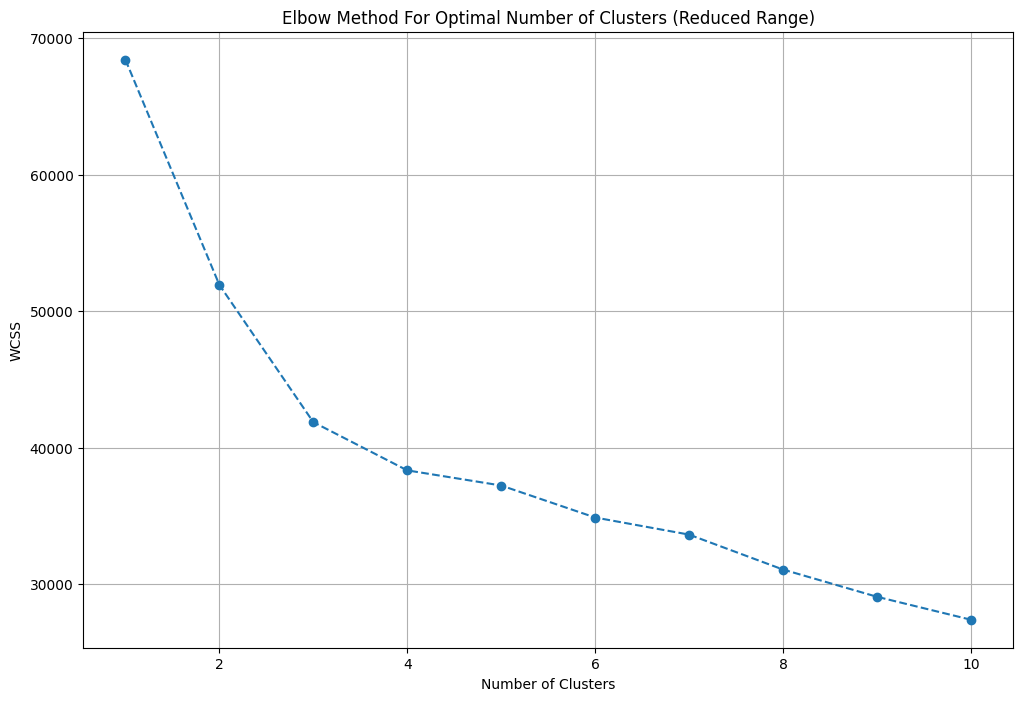

In [45]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [47]:
df = df.iloc[:,:-18]

In [48]:
df['furnishing_type'] = cluster_assignments

In [49]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3180,"['1 Water Purifier', '8 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '6 Geyser', '1 Stove', '40 Light', '1 Chimney', '1 Modular Kitchen', '1 Curtains', '5 Wardrobe', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No AC', 'No Bed', 'No TV']",1
2425,"['5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
3477,NaN,0
1256,[],0
201,"['1 Water Purifier', '6 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '24 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '6 Wardrobe', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",2


## 5.features

In [50]:
df[['society','features']].sample(5)

,society,features
1911,smart world orchard,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1048,independent,"['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
2797,emaar imperial gardens3.8 ï¿½,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
1062,satya element one,NaN
396,sobha city,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [51]:
df['features'].isnull().sum()

np.int64(635)

In [52]:
import pandas as pd
app_df = pd.read_csv('apartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPS International SchoolG Palam Vihar', 'Park Hospital, Palam Vihar', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPS International SchoolG Palam Vihar': '3.1 KM', 'Park Hospital, Palam Vihar': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expressway': '1.2 KM', 'Hyatt Regency Gurgaon': '7.7 KM', 'Dwarka Expressway Sector 21 Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food WaterPark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '????????? 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '????????? 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '?????????","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPS International SchoolG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt']","{'DPS International SchoolG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt': '1.2 Km', 'Dwarka Expressway Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food WaterPark': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Regency Gurgaon': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '????????? 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '????????? 3.08","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [53]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [54]:
temp_df = df[df['features'].isnull()]

In [55]:
temp_df.shape

(635, 26)

In [56]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [57]:
df.loc[temp_df.index,'features'] = x.values

In [58]:
df['features'].isnull().sum()

np.int64(525)

In [59]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [60]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [61]:
features_binary_df.sample(5)

,24/7 Power Backup,24x7 Security,ATM,Aerobics Centre,Airy Rooms,Amphitheatre,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Terrace Garden,Theatre,Toddler Pool,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2316,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1785,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
3188,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
1253,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3660,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0


In [62]:
features_binary_df.shape

(3802, 121)

In [63]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

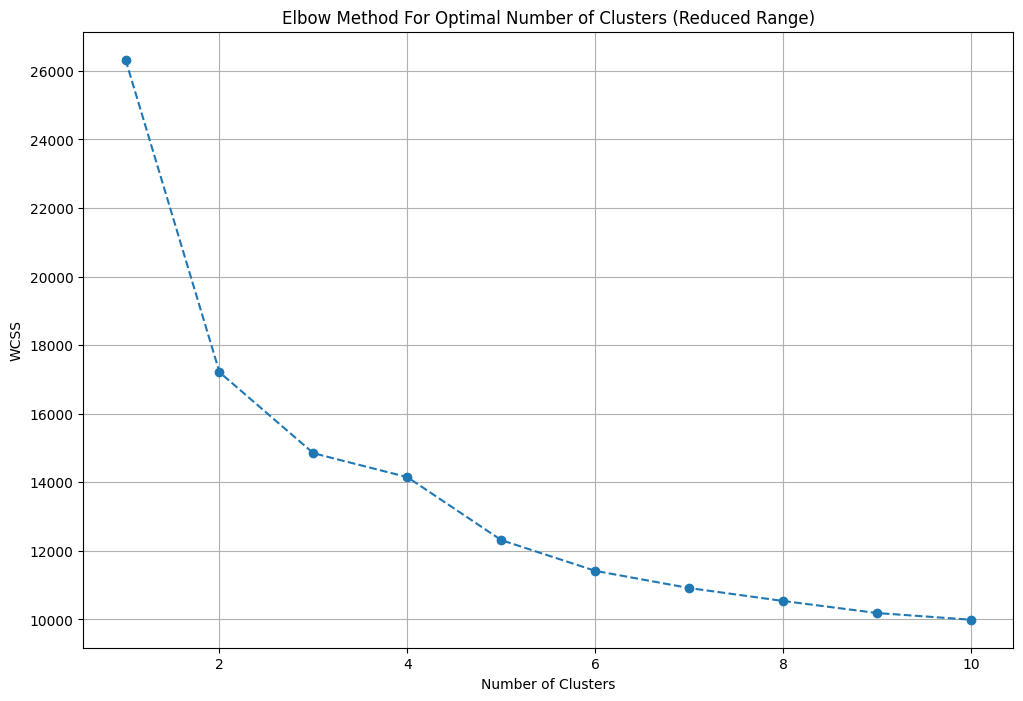

In [64]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [66]:
missing_features = [feature for feature in weights if feature not in features_binary_df.columns]
print("Missing features from DataFrame:", missing_features)


Missing features from DataFrame: ['24/7 Water Supply', 'Car Parking', 'Multipurpose Hall', 'Temple', 'Valet Parking']


In [67]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
# luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [68]:
# Step 1: Filter weights to include only features actually present in the DataFrame
available_features = [feature for feature in weights if feature in features_binary_df.columns]
filtered_weights = {feature: weights[feature] for feature in available_features}

# Step 2: Calculate the luxury score safely using only available features
luxury_score = features_binary_df[available_features].multiply(
    list(filtered_weights.values())
).sum(axis=1)

# Step 3 (Optional): Store the luxury score in your DataFrame for further use
features_binary_df['luxury_score'] = luxury_score


In [69]:
df['luxury_score'] = luxury_score

In [70]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,smart world orchard,sector 61,2.57,15766.0,1630.0,Carpet area: 1630 (151.43 sq.m.),3.0,3.0,2,study room,3.0,North-East,Under Construction,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']","['3 AC', '1 Chimney', '1 Modular Kitchen', '1 TV', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",['Lift(s)'],NaN,NaN,1630.0,1,0,0,0,0,0,[Lift(s)],0
1,flat,m3m one key resiments,sector 67,0.80,13115.0,610.0,Built Up area: 610 (56.67 sq.m.),1.0,1.0,0,not available,0.0,NaN,Undefined,"['Global Foyer Mall', 'Dwarka Expressway', 'ST. SOLDIER DIVINE PUBLIC SCHOOL', 'Monika Hospital', 'Indira Gandhi International Airport', 'Palam Vihar Halt', 'Fun N Food Village']",NaN,NaN,NaN,610.0,NaN,0,0,0,0,0,0,[],0
2,flat,paras dews,sector 106,1.25,10656.0,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up area: 1305 sq.ft. (121.24 sq.m.)Carpet area: 1173 sq.ft. (108.98 sq.m.),3.0,4.0,3,"study room,servant room",14.0,East,Relatively New,"['MG Road Metro Station', 'NeoSquare Shopping Mall', 'Dwarka Expressway', 'Glorious World School', 'DPG Institute of Technology', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon', 'Country Inn & Suites by Radisson', 'SkyJumper Trampoline Park', 'Hamoni Golf Camp']",NaN,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1900.0,1305.0,1173.0,1,1,0,0,0,0,"[Water purifier, Centrally Air Conditioned, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",167
3,flat,ss the leaf3.8 ï¿½,sector 85,1.10,6318.0,1741.0,Super Built up area 1741(161.74 sq.m.)Carpet area: 1218 sq.ft. (113.16 sq.m.),2.0,2.0,3+,store room,3.0,South-East,Relatively New,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['10 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purif

In [71]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [72]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
556,flat,rof ananda,sector 95,0.20,5599.0,357.0,Carpet area: 366.08 (34.01 sq.m.),1.0,1.0,1,2.0,South-West,Relatively New,NaN,NaN,366.080239,0,0,0,1,0,0,53
1873,flat,experion windchants3.8 ï¿½,sector 112,5.60,11529.0,4857.0,Super Built up area 4857(451.23 sq.m.)Built Up area: 3662.34 sq.ft. (340.24 sq.m.),4.0,6.0,3+,15.0,North-East,Moderately Old,4857.0,3662.34,NaN,0,1,0,0,0,2,157
1918,house,row house,sector 105,0.43,9135.0,471.0,Plot area 52(43.48 sq.m.)Built Up area: 1050 sq.yards (877.93 sq.m.),3.0,3.0,3,2.0,NaN,Relatively New,NaN,1050.00,NaN,0,0,0,0,0,0,0
2699,flat,godrej oasis3.9 ï¿½,sector 88a,1.15,7116.0,1616.0,Super Built up area 1616(150.13 sq.m.)Carpet area: 1168 sq.ft. (108.51 sq.m.),2.0,2.0,3,14.0,South-East,Relatively New,1616.0,NaN,1168.000000,1,0,0,1,0,0,174
3315,flat,zara aavaas,sector 104,0.22,7302.0,301.0,Carpet area: 301.28 (27.99 sq.m.),1.0,2.0,2,2.0,NaN,New Property,NaN,NaN,301.281561,0,0,0,0,0,0,60


In [73]:
df.shape

(3802, 23)

In [74]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)